**Topic:**        Challenge Set 1  
**Subject:**      Explore MTA turnstile data  
**Date:**         09/24/2017  
**Name:**         Laura Howard

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser
import seaborn as sns
import datetime as dt

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.precision', 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Challenge 1

In [3]:
df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170422.txt')

In [4]:
df['UNIQUE'] = df['C/A'] + df['UNIT'] + df['SCP'] + df['STATION']
df['NEW_ENTRIES'] = df.groupby(['UNIQUE'])['ENTRIES'].diff()
df = df.rename(columns=lambda x: x.strip())

**TA COMMENT:**

Good use of the diff method. Most people use the shift method but diff works just as well.

In [5]:
df = df.drop(df[df.NEW_ENTRIES < 0].index)
df = df.drop(df[df.NEW_ENTRIES > 10000].index)
df = df.dropna(how = 'any')

In [6]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,UNIQUE,NEW_ENTRIES
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,04:00:00,REGULAR,6136613,2078947,A002R05102-00-0059 ST,33.000
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,08:00:00,REGULAR,6136639,2078987,A002R05102-00-0059 ST,26.000
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,12:00:00,REGULAR,6136799,2079109,A002R05102-00-0059 ST,160.000
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,16:00:00,REGULAR,6137076,2079173,A002R05102-00-0059 ST,277.000
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,20:00:00,REGULAR,6137520,2079204,A002R05102-00-0059 ST,444.000


### Challenge 2

In [7]:
df['DATE_TIME'] = df['DATE'] + ' ' + df ['TIME']

In [8]:
df['DATE_TIME'] = df['DATE_TIME'].map(dateutil.parser.parse)

In [9]:
df2 = df.groupby(['UNIQUE', 'DATE_TIME']).sum()
df2.drop(['ENTRIES','EXITS'], axis=1)

NEW_ENTRIES
UNIQUE                         DATE_TIME                       
A002R05102-00-0059 ST          2017-04-15 04:00:00       33.000
                               2017-04-15 08:00:00       26.000
                               2017-04-15 12:00:00      160.000
                               2017-04-15 16:00:00      277.000
                               2017-04-15 20:00:00      444.000
                               2017-04-16 00:00:00      212.000
                               2017-04-16 04:00:00       25.000
                               2017-04-16 08:00:00       27.000
                               2017-04-16 12:00:00       83.000
                               2017-04-16 16:00:00      188.000
...                                                         ...
TRAM2R46900-05-01RIT-ROOSEVELT 2017-04-20 09:00:00        0.000
                               2017-04-20 13:00:00        0.000
                               2017-04-20 17:00:00        0.000
                               2017-04-20 21:00:00        0.000
                               2017-04-21 01:00:00        0.000
                               2017-04-21 05:00:00        0.000
                               2017-04-21 09:00:00        0.000
                               2017-04-21 13:00:00        0.000
                               2017-04-21 17:00:00        0.000
                               2017-04-21 21:00:00        0.000

[191232 rows x 1 columns]

### Challenge 3

Currently there is an entry for every 4 hours for each unique key. The below dataframe groups by each day and sums new entries for each unique key instead.

In [10]:
df3 = df.groupby(['UNIQUE', 'DATE']).sum()
df3.drop(['ENTRIES','EXITS'], axis=1)

NEW_ENTRIES
UNIQUE                         DATE                   
A002R05102-00-0059 ST          04/15/2017      940.000
                               04/16/2017      740.000
                               04/17/2017     1390.000
                               04/18/2017     1883.000
                               04/19/2017     1841.000
                               04/20/2017     2090.000
                               04/21/2017     2305.000
A002R05102-00-0159 ST          04/15/2017      352.000
                               04/16/2017      454.000
                               04/17/2017      950.000
...                                                ...
TRAM2R46900-05-00RIT-ROOSEVELT 04/19/2017        2.000
                               04/20/2017        0.000
                               04/21/2017        1.000
TRAM2R46900-05-01RIT-ROOSEVELT 04/15/2017        0.000
                               04/16/2017        0.000
                               04/17/2017        0.000
                               04/18/2017        0.000
                               04/19/2017        0.000
                               04/20/2017        0.000
                               04/21/2017        0.000

[32610 rows x 1 columns]

### Challenge 4

In [11]:
df_ts = df.groupby(['UNIQUE', 'DATE'])['NEW_ENTRIES'].sum().reset_index()
turnstile1 = df_ts[(df_ts['UNIQUE'] == "A002R05102-00-0059 ST")]
turnstile1

,UNIQUE,DATE,NEW_ENTRIES
0,A002R05102-00-0059 ST,04/15/2017,940.000
1,A002R05102-00-0059 ST,04/16/2017,740.000
2,A002R05102-00-0059 ST,04/17/2017,1390.000
3,A002R05102-00-0059 ST,04/18/2017,1883.000
4,A002R05102-00-0059 ST,04/19/2017,1841.000
5,A002R05102-00-0059 ST,04/20/2017,2090.000
6,A002R05102-00-0059 ST,04/21/2017,2305.000


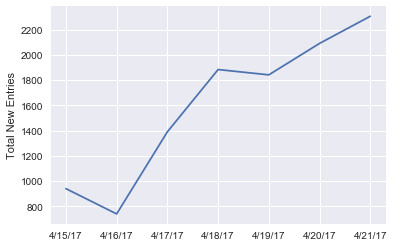

In [12]:
labels = ['4/15/17', '4/16/17', '4/17/17', '4/18/17', '4/19/17', '4/20/17', '4/21/17']

plt.plot(range(7), turnstile1['NEW_ENTRIES'], '')
plt.xticks(range(7), labels)
plt.ylabel('Total New Entries');

### Challenge 5

In [13]:
df_area = df.groupby(['STATION', 'C/A', 'UNIT', 'DATE'])['NEW_ENTRIES'].sum().reset_index()
df_area

,STATION,C/A,UNIT,DATE,NEW_ENTRIES
0,1 AV,H007,R248,04/15/2017,6065.000
1,1 AV,H007,R248,04/16/2017,6083.000
2,1 AV,H007,R248,04/17/2017,10050.000
3,1 AV,H007,R248,04/18/2017,11068.000
4,1 AV,H007,R248,04/19/2017,13322.000
5,1 AV,H007,R248,04/20/2017,13494.000
6,1 AV,H007,R248,04/21/2017,13730.000
7,1 AV,H008,R248,04/15/2017,5772.000
8,1 AV,H008,R248,04/16/2017,5633.000
9,1 AV,H008,R248,04/17/2017,7188.000


### Challenge 6

In [14]:
df_station = df.groupby(['STATION', 'DATE'])['NEW_ENTRIES'].sum().reset_index()
df_station

,STATION,DATE,NEW_ENTRIES
0,1 AV,04/15/2017,11837.000
1,1 AV,04/16/2017,11716.000
2,1 AV,04/17/2017,17238.000
3,1 AV,04/18/2017,19657.000
4,1 AV,04/19/2017,22889.000
5,1 AV,04/20/2017,23279.000
6,1 AV,04/21/2017,24305.000
7,103 ST,04/15/2017,17806.000
8,103 ST,04/16/2017,16574.000
9,103 ST,04/17/2017,28388.000


### Challenge 7

In [15]:
station1 = df_station[(df_station['STATION'] == "1 AV")]
station1

,STATION,DATE,NEW_ENTRIES
0,1 AV,04/15/2017,11837.000
1,1 AV,04/16/2017,11716.000
2,1 AV,04/17/2017,17238.000
3,1 AV,04/18/2017,19657.000
4,1 AV,04/19/2017,22889.000
5,1 AV,04/20/2017,23279.000
6,1 AV,04/21/2017,24305.000


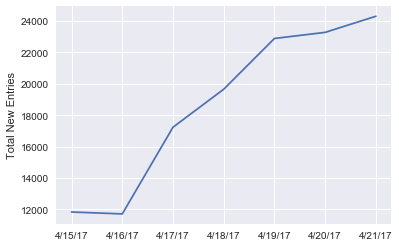

In [16]:
labels = ['4/15/17', '4/16/17', '4/17/17', '4/18/17', '4/19/17', '4/20/17', '4/21/17']

plt.plot(range(7), station1['NEW_ENTRIES'], '')
plt.xticks(range(7), labels)
plt.ylabel('Total New Entries');

### Challenge 8

In [17]:
df4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170401.txt')

In [18]:
df5 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170408.txt')

In [19]:
df6 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170415.txt')

In [20]:
df7 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170422.txt')

In [21]:
df8 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170429.txt')

**TA COMMENT:**

Could this step of reading additional text files be done with a loop? It might be good to automate this process rather than manually enter in each link to the text file.

In [22]:
df_all = pd.concat([df4, df5, df6, df7, df8])
df_all = df_all.reset_index()
df_all

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,00:00:00,REGULAR,6108321,2069313
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,04:00:00,REGULAR,6108343,2069319
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,08:00:00,REGULAR,6108360,2069347
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,12:00:00,REGULAR,6108462,2069456
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,16:00:00,REGULAR,6108689,2069525
5,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,20:00:00,REGULAR,6108983,2069570
6,6,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2017,00:00:00,REGULAR,6109170,2069608
7,7,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2017,04:00:00,REGULAR,6109213,2069615
8,8,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2017,08:00:00,REGULAR,6109224,2069630
9,9,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2017,12:00:00,REGULAR,6109284,2069706


In [23]:
df_all['UNIQUE'] = df_all['C/A'] + df_all['UNIT'] + df_all['SCP'] + df_all['STATION']
df_all['NEW_ENTRIES'] = df_all.groupby(['UNIQUE'])['ENTRIES'].diff()
df_all = df_all.rename(columns=lambda x: x.strip())

In [24]:
df_all = df_all.drop(df_all[df_all.NEW_ENTRIES < 0].index)
df_all = df_all.drop(df_all[df_all.NEW_ENTRIES > 10000].index)
df_all = df_all.dropna(how = 'any')
df_all.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,UNIQUE,NEW_ENTRIES
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,04:00:00,REGULAR,6108343,2069319,A002R05102-00-0059 ST,22.000
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,08:00:00,REGULAR,6108360,2069347,A002R05102-00-0059 ST,17.000
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,12:00:00,REGULAR,6108462,2069456,A002R05102-00-0059 ST,102.000
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,16:00:00,REGULAR,6108689,2069525,A002R05102-00-0059 ST,227.000
5,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,20:00:00,REGULAR,6108983,2069570,A002R05102-00-0059 ST,294.000


In [25]:
df_all['DATE_TIME'] = df_all['DATE'] + ' ' + df_all['TIME']

In [26]:
df_all['DATE_TIME'] = df_all['DATE_TIME'].map(dateutil.parser.parse)

**TA COMMENT:**

These preprocessing steps could be wrapped in a helper function since these steps are the same as the ones you did at the beginning of the notebook. The use of helper functions would reduce the repeatedness of your code.

In [27]:
df_all['NEW_DATE'] = df_all['DATE'].map(dateutil.parser.parse)

In [28]:
df_all['DAY'] = df_all['NEW_DATE'].dt.dayofweek

In [29]:
df_all['WEEK'] = df_all['NEW_DATE'].dt.week
df_all.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,UNIQUE,NEW_ENTRIES,DATE_TIME,NEW_DATE,DAY,WEEK
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,04:00:00,REGULAR,6108343,2069319,A002R05102-00-0059 ST,22.000,2017-03-25 04:00:00,2017-03-25,5,12
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,08:00:00,REGULAR,6108360,2069347,A002R05102-00-0059 ST,17.000,2017-03-25 08:00:00,2017-03-25,5,12
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,12:00:00,REGULAR,6108462,2069456,A002R05102-00-0059 ST,102.000,2017-03-25 12:00:00,2017-03-25,5,12
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,16:00:00,REGULAR,6108689,2069525,A002R05102-00-0059 ST,227.000,2017-03-25 16:00:00,2017-03-25,5,12
5,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,20:00:00,REGULAR,6108983,2069570,A002R05102-00-0059 ST,294.000,2017-03-25 20:00:00,2017-03-25,5,12


In [30]:
df_all_date = df_all.groupby(['STATION', 'NEW_DATE', 'WEEK', 'DAY'])['NEW_ENTRIES'].sum().reset_index()

In [31]:
df_week_station = df_all_date[(df_all_date['STATION'] == "1 AV") & (df_all_date['WEEK'] != 12) & (df_all_date['WEEK'] != 17)]
df_week_station

,STATION,NEW_DATE,WEEK,DAY,NEW_ENTRIES
2,1 AV,2017-03-27,13,0,21354.000
3,1 AV,2017-03-28,13,1,22446.000
4,1 AV,2017-03-29,13,2,22936.000
5,1 AV,2017-03-30,13,3,23892.000
6,1 AV,2017-03-31,13,4,24693.000
7,1 AV,2017-04-01,13,5,17281.000
8,1 AV,2017-04-02,13,6,16626.000
9,1 AV,2017-04-03,14,0,21346.000
10,1 AV,2017-04-04,14,1,22283.000
11,1 AV,2017-04-05,14,2,22567.000


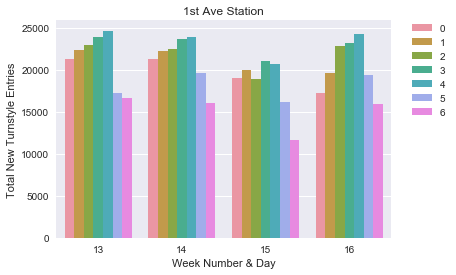

In [32]:
ax = sns.barplot(x=df_week_station['WEEK'], y=df_week_station['NEW_ENTRIES'], hue=df_week_station['DAY']);
ax.set(xlabel='Week Number & Day', ylabel='Total New Turnstyle Entries', )
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('1st Ave Station')
plt.show()

**TA COMMENT:**

It might be interesting to see a plot that is split by the day of week so that you could compare, for example, Monday's traffic for week 13 through week 16.

### Challenge 9

In [33]:
df_totals = df_all.groupby(['STATION'])['NEW_ENTRIES'].sum().reset_index()
df_totals = df_totals.sort_values("NEW_ENTRIES", ascending=False).head(10)
df_totals

,STATION,NEW_ENTRIES
61,34 ST-PENN STA,5055739.000
233,GRD CNTRL-42 ST,4446111.000
59,34 ST-HERALD SQ,3704444.000
46,23 ST,3593482.000
14,14 ST-UNION SQ,3382987.000
350,TIMES SQ-42 ST,3109291.000
68,42 ST-PORT AUTH,2905676.000
226,FULTON ST,2799199.000
110,86 ST,2681198.000
86,59 ST COLUMBUS,2323809.000


### Challenge 10

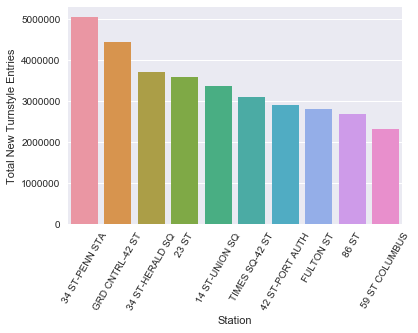

In [34]:
ax = sns.barplot(x=df_totals['STATION'], y=df_totals['NEW_ENTRIES']);
ax.set(xlabel='Station', ylabel='Total New Turnstyle Entries', )
ax.set_xticklabels(df_totals['STATION'], rotation=60)
plt.show()

**TA COMMENT:**

Overall, I think you did a great job on this challenge. I left a few comments throughout the notebook that targets specific lines in your code. The main, general comments I have would be:
1. If you find yourself copying code from one part of the notebook to another, take a step back and see if a helper function can be used.
2. Loops can be a powerful tool to use especially when you find yourself needing to iterate through similar objects, such as text files.